# Exploring and processing the titanic data

This is the notebook for the first module on EDA (exploratory data analysis) in the course, which will use pandas to explore the titanic dataset.

In [1]:
# imports
import pandas as pd
import numpy as np
import os
%matplotlib inline

## Import the data

In [2]:
# set the file paths for the data
raw_data_path = os.path.join(os.getcwd(), 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
# import the data into pandas DataFrames, setting the PassengerID as the index column
train_df = pd.read_csv(train_file_path, index_col="PassengerId")
test_df = pd.read_csv(test_file_path, index_col="PassengerId")

In [4]:
# test the type
type(train_df)

pandas.core.frame.DataFrame

## Basic structure of the datasets

In [5]:
# use .info() to get brief information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Decoding the columns 

Most of the columns are easy to understand, but there are a couple that need clarification.

SibSp - is the number of siblings and/or spouses aboard for a passenger
Parch - is the number of parents and/or children aboard for a passenger
Ticket - is the tickey number
Fare - is the fare paid by the passenger
Embared - is the port where the passenger embared (C = Cherbourg, Q = Queenstown, S = Southampton)

Notice there is no survived column in the test dataset. An extra column can be added with a default value to fix that for now. The final step in this course is to predict the survival of passengers in the test dataset.

In [7]:
test_df['Survived'] = -888

In [8]:
# to explore the full dataset, concatenate them. You can add an optional parameter axis to set how the concat works
# setting axis=0 stacks the rows on top of each other (unions), axis = 1 stacks them side by side (full join, ish)
df = pd.concat([train_df, test_df], axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


You can use the head() or tail() methods to quickly examine parts of the dataset.

In [10]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


## Selecting rows and columns with pandas

### Indexes

There are two basic ways of selecting columns in a dataframe: dot notation and using column name inside a square bracket.

In [12]:
# dot notation selection
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
# column name using square brackets, should return same as above
df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [14]:
# working on more than one column - don't forget you need double brackets, because you're passing a list of columns
df[['Name', 'Age']].head()

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


Data can also be accessed by rows and columns, using indexes. Use loc[  ] for label-based indexing - PassengerId is the index for this DataFrame. If you want all the columns for an index range, use loc[range,] and don't forget the comma! If you only want certain columns, use loc[range, [column list]] or loc[range, column range].

In [15]:
# return a certain index range, all columns. Note the comma!
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [16]:
# return a certain index range, for specific columns
df.loc[5:10, ['Age', 'Embarked']]

,Age,Embarked
PassengerId,,
5,35.0,S
6,NaN,Q
7,54.0,S
8,2.0,S
9,27.0,S
10,14.0,C


In [17]:
# return a certain index range, for a column range using column names
df.loc[5:10, 'Age': 'Fare']

,Age,Cabin,Embarked,Fare
PassengerId,,,,
5,35.0,NaN,S,8.0500
6,NaN,NaN,Q,8.4583
7,54.0,E46,S,51.8625
8,2.0,NaN,S,21.0750
9,27.0,NaN,S,11.1333
10,14.0,NaN,C,30.0708


Pandas also allows position based indexing, using the iloc[  ] function. The column that is the current index (PassengerId here) won't be counted in the column positioning, but it will be returned. The index is always returned.

In [18]:
# position-based indexing, here we are getting rows 5:10 and columns 3:8
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


### Filters

Pandas allows you to use boolean queries to filter and select data.

In [19]:
# filter rows based on a condition - this creates a new dataframe called male_passengers
male_passengers = df.loc[df.Sex == 'male',:]
print("Number of male passengers: {0}".format(len(male_passengers)))

Number of male passengers: 843


In [20]:
# operators & and | (and/or) can be used to build more complex conditions
male_first_class_passengers = df.loc[((df['Sex']=='male') & (df['Pclass']==1)), :]
print("Number of male first class passengers: {0}".format(len(male_first_class_passengers)))

Number of male first class passengers: 179


## Summary statistics

The type of summary statistics available will depend on the type of data you're working with. Numerical data will have centraility statistics (mean, median, etc) and dispersal states (range, percentiles, variance, standard deviation etc.)

For categorical values, you can get counts, unique values, category counts, proportions, per category stats, etc.

### Mean/average

It's not very useful because it's affected so heavily by outliers

In [21]:
# pandas has mean built in
df['Age'].mean()

29.881137667304014

### Median

It's the middle value in a group of sorted values. It's less affected by outliers.

In [22]:
# pandas also has a built-in for median
df['Age'].median()

28.0

### Dispersion measures

Centrality values such as mean and median aren't useful on their own. It's useful to know the spread and how many values are grouped around the mean/median, to get an idea of how the values are related.

Percentiles: x percenitile is y, means x% of the values are below y.

e.g. 50th percentile is 28.000, means 50% of the passengers were under 28.0000.

Quartiles split data into four buckets (<25%, 25-50%, 50-75%, >75%) and they are used in a special kind of visualisation called a box and whiskers plot (with min and max).

The interquartile range (IQR) is the difference between 25th and 75th percentile.

Pandas has the describe() function that gives a short-cut to some of these measures.

In [23]:
# get summary statistics for all numerical features
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [24]:
# From the mean, median, and the percentiles, it looks like the majority of passengers were young, but let's confirm
# that there aren't a huge number of passengers over 50.
perc_over_50 = (len(df.loc[df['Age'] > 50])/df['Age'].count())*100
print("Percentage of passengers over 50: {0}%".format(round(perc_over_50, 2)))

Percentage of passengers over 50: 9.08%


### Variance and standard deviation

Variance is calculated as sum((mean - measure)**2)/count.

Standard deviation is the square root of the variance. And it's in the same unit as the measure.

Low standard deviation means low spread, high standard deviation means high spread.

In [25]:
# pandas has a built in function to calculate the standard deviation. Phew!
age_std = df['Age'].std()
print("The standard deviation of passenger age is: {0}".format(round(age_std, 2)))

The standard deviation of passenger age is: 14.41


In [26]:
# pandas also has the built in functions for quantiles
age_25_q = df['Age'].quantile(.25)
print("The 25th quantile of passenger age is: {0}".format(round(age_25_q, 2)))

The 25th quantile of passenger age is: 21.0


In [27]:
# and pandas even has a variance function, which doesn't seem that useful but hey ho
age_var = df['Age'].var()
print("The variance of passenger age is: {0}".format(round(age_var,2)))

The variance of passenger age is: 207.75


### Box and whiskers plot

As discussed above, quartiles and max/min can be plotted on a box and whiskers plot. The lines top and bottom are max/min with outliers removed, the box in the middle is the 25/50/75 quartile. The dots above the max are the outliers - anything that is more than 1.5 times the 75th percentile is considered an outlier.

This kind of plot gives a visual impression of the range of a dataset.

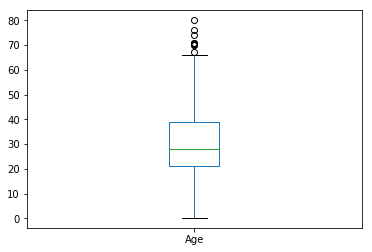

In [28]:
df['Age'].plot(kind='box')

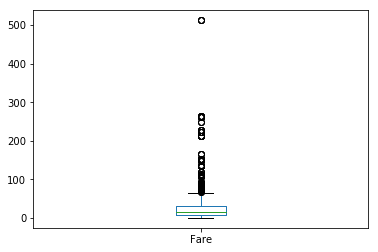

In [29]:
df['Fare'].plot(kind='box')

## Summary statistics for categorical data

This is columns like gender, so you can use counts and proportions etc. to get a picture of the categorical columns.

In [30]:
# use include=all on describe() to get non-numeric columns. This adds unique, top, and freq for categorical columns
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [31]:
# You can use value_counts() on categorical data to get the count for each unique value
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [32]:
# to get propoortions instead of plain counts, set normalize=True
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [33]:
# You can use value_counts() with a filter, for example to remove the default value we assigned to survived earlier
df[df['Survived'] != -888]['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
# Find the passenger class counts
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

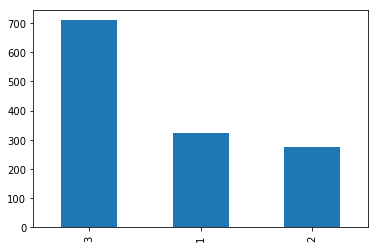

In [35]:
# We can visualize the counts very easily, although it's not that pretty initially!
df.Pclass.value_counts().plot(kind='bar')

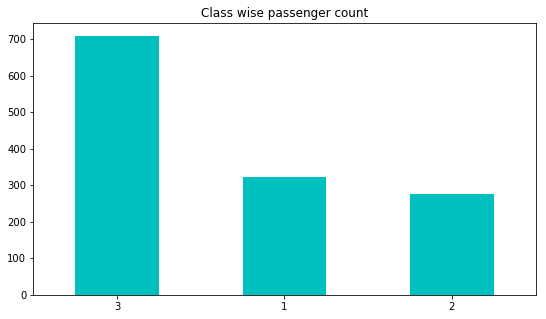

In [36]:
# set the rot: 0 to rotate the x-axis, use the colour property to improve the bar colour, and set a title
# use a semi-colon at the end to suppress the matplotlib output line at the top
df.Pclass.value_counts().plot(kind='bar', title='Class wise passenger count', rot=0, color='c', figsize=(9,5));

## More distribution concepts

### Univariate distribution

Univariate distribution describes one feature rather than many. Histograms are a popular tool to visualise these - they are a visual represntation of a frequency table with counts of things in buckets. For example, counts in age ranges, and the histogram is a bar chart of the frequency for each bucket. 

KDE (kernel-density estimation) is another populare tool for visualising univariate distribution. It looks at probability instead of frequency, and frequency is related to probability. A KDE plot is a smooth line rather than a bar.

### But what do these mean?

The most common distribution is the normal distribution. A perfect normal distribution will look like a bell curve and will centre along the median. In a perfect normal distribution, this will also be the mean. There is no skewing.

But if the median is to the right of the mean, it is right (positive) skewed and has a longer right long tail.

If the mean line is smaller than the median, it's a left line skew - the data is skewed left or negative.

### Bivariate distribution

Bivariate distribution looks at the relationship between two features at once. A popular tool for visualising it is a scatter plot.

## Visualise the distributions

Start with a histogram, because it's simplest.

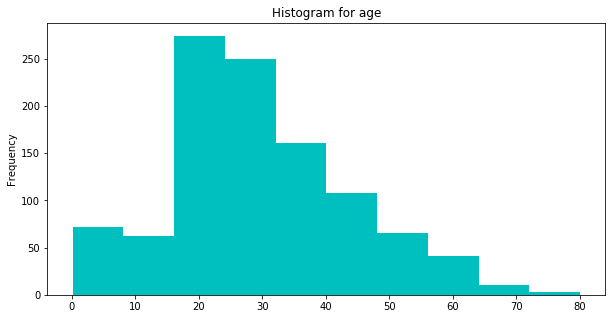

In [37]:
# the plot type for a histogram is 'hist', this one sets the bins automatically
df.Age.plot(kind='hist', title="Histogram for age", color="c", figsize=(10,5));

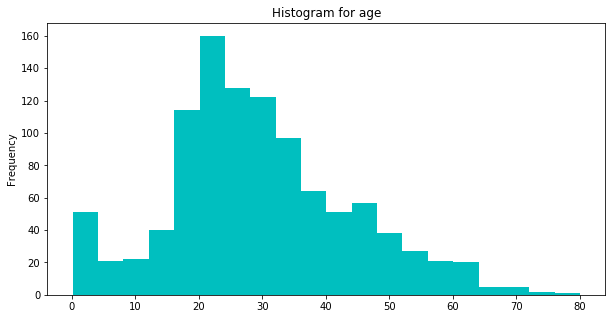

In [38]:
# use the bins property to change the number of bins pandas uses
df.Age.plot(kind='hist', title="Histogram for age", color="c", figsize=(10,5), bins=20);

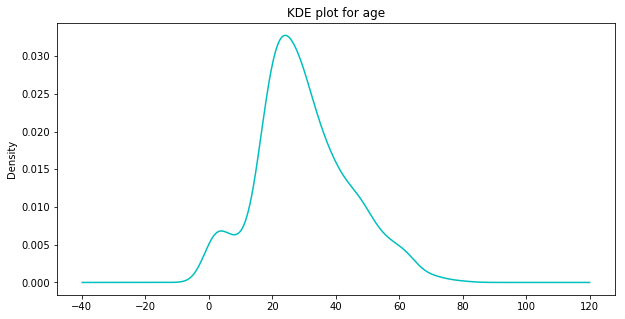

In [39]:
# pandas also has a KDE plot built in and easy to use
df.Age.plot(kind="kde", title="KDE plot for age", color="c", figsize=(10,5));

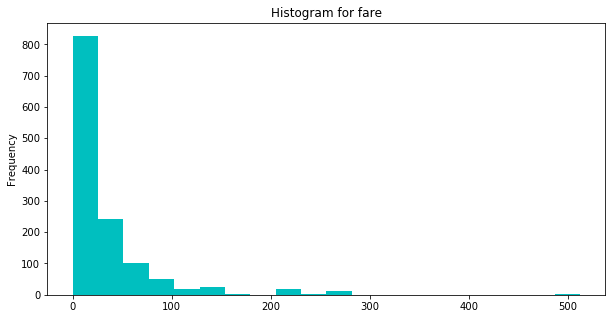

In [40]:
# examining the histogram for fare shows it's very positively skewed
df.Fare.plot(kind='hist', title="Histogram for fare", color="c", figsize=(10,5), bins=20);

In [41]:
# you can use the skew function to find the skewness of a feature
print("skewness for age: {0:.2f}".format(df.Age.skew()))
print("skewness for fare: {0:.2f}".format(df.Fare.skew()))

skewness for age: 0.41
skewness for fare: 4.37


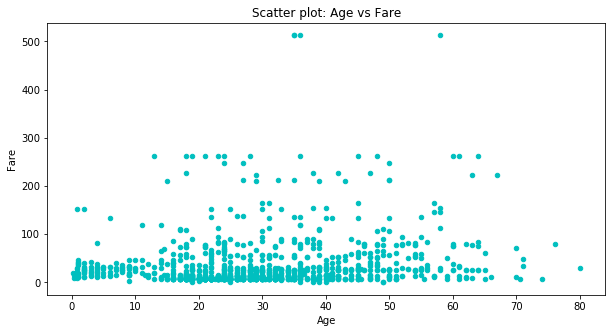

In [42]:
# use a scatter plot to visualise fare against age, a bivariant distribution
df.plot.scatter(x="Age", y="Fare", color="c", title="Scatter plot: Age vs Fare", figsize=(10,5));

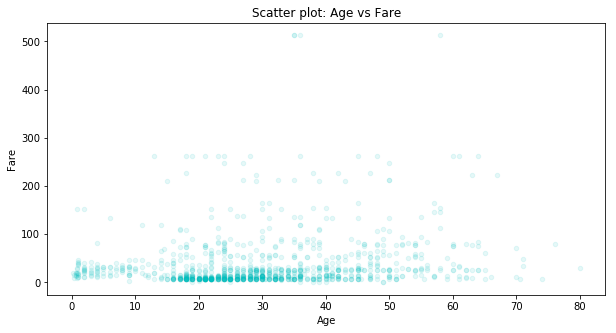

In [43]:
# there aren't many interesting features here
# you can use the alpha variable to change the transparancy of the dot, helpful when many dots cluster
# in the areas of densest clustering, the dots are darker, which helps to bring out hidden features
df.plot.scatter(x="Age", y="Fare", color="c", title="Scatter plot: Age vs Fare", alpha=0.1,
                figsize=(10,5));

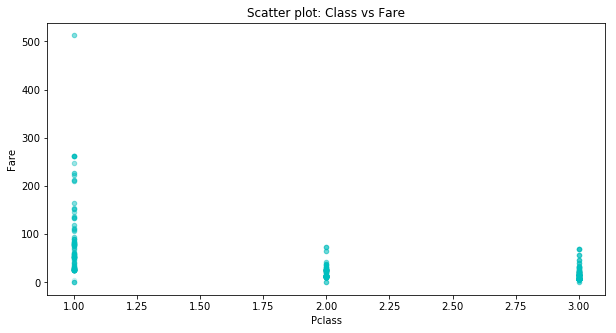

In [44]:
# maybe fare and class show something more useful
df.plot.scatter(x="Pclass", y="Fare", color="c", title="Scatter plot: Class vs Fare", alpha=0.15,
                figsize=(10,5));

## Grouping and aggregation of data

To group the data in pandas, use the groupby function and pass a column name or list of column names. Then you can pass a column name that you want to perform a calculation on.

In [45]:
# for example, group by sex and calculate the median age
df.groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [46]:
# this can also be achieved with this:
df.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [47]:
# to get the median fare by class
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [48]:
# find the median age by class
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [49]:
# to get statistics for multiple columns aggregated to the same level, pass multiple columns as a list
# so this will get median age and fare by class
df.groupby(['Pclass'])['Age', 'Fare'].median()

,Age,Fare
Pclass,,
1,39.0,60.0000
2,29.0,15.0458
3,24.0,8.0500


In [50]:
# you can use the agg function to get multiple types of statistics on columns in one go. This takes a dictionary
# of column and function as the argument
df.groupby(['Pclass']).agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [52]:
# you can use a nested dictionary to make an even more complication aggregation
aggregations = {
    'Fare': {# work on the fare column
        'mean_Fare': 'mean',
        'median_Fare': 'median',
        'max_fare': max,
        'min_fare': np.min #this demonstrates using the NumPy function in the aggregation
        },
    'Age' : {
        'median_Age': 'median', # work on the age column
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x) # calcualate the age range per group
    }
}

In [53]:
df.groupby(['Pclass']).agg(aggregations)

/Users/katherinejay/anaconda3/envs/analysis/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_fare min_fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

This method will be deprecated so should probably not be used any more. There is a stack overflow discussion here about using the apply() method to achieve the same thing: https://stackoverflow.com/questions/44635626/pandas-aggregation-warning-futurewarning-using-a-dict-with-renaming-is-depreca

In [54]:
# this will do the aggregations at a multi-column level
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstab

This is useful on categorical data - it creates cross tabulations. Think of it as a table of frequency correlated by categories.

In [55]:
# create a crosstab on gender and Pclass
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


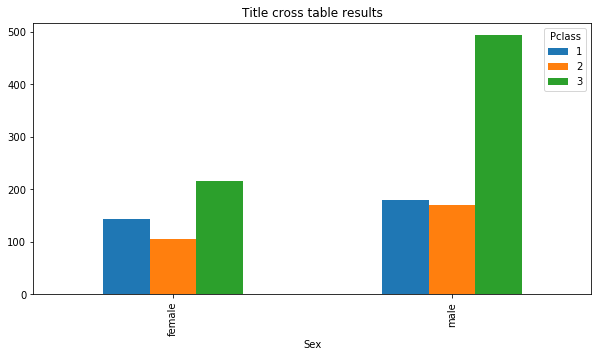

In [57]:
# this can be visualsed through a bar chart
pd.crosstab(df['Sex'], df['Pclass']).plot(kind="bar", title="Title cross table results", figsize=(10,5));

## Pivot table

It's sort of a natural extension of cross tab and it's what a pivot table is in Excel or SQL. So for the example above, instead of a frequency, we want the mean age by class and sex.

In [60]:
# a pivot table
df.pivot_table(index="Sex", columns="Pclass", values="Age", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [61]:
# you can get the same info with a groupby
df.groupby(["Sex","Pclass"]).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [62]:
# this is the same info, but presented in a different format than the pivot table
# adding the unstack function replicates the pivot table
df.groupby(["Sex","Pclass"]).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


This final part demonstrates that there are often several ways to do the same thing in pandas, so it's up to the developer to decide what is the best way to do it for their particular use.